In [1]:
import pandas as pd

#Load the dataset
data = pd.read_csv("WorldHappinessReport.csv")

#Display the first 10 rows
print(data.head(10));

#Identify the number of rows and colums in the dataset
rows, columns = data.shape
print("Number of rows:",rows)
print("Number of columns:",columns)

#List all the columns and data
print(data.dtypes)

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724              

In [2]:
#Calculate the mean of values in the score column
mean= data['score'].mean()
print("Mean of score column:",mean)

#Calculate the median of values in the score column
median = data['score'].median()
print("Median of score column:",median)

#Calculate the standard deviation of values in the score column
std=data['score'].std();
print("Standard deviation of score column:",std)


#Country with highest happiness score
highest=data.loc[data['score'].idxmax(),'Country name']
print(highest,"has the highest happiness rate.")

#Country with highest happiness score
lowest=data.loc[data['score'].idxmin(),'Country name']
print(lowest," has the lowest happiness rate.")

Mean of score column: 5.52758041958042
Median of score column: 5.785
Standard deviation of score column: 1.1707165099442995
Finland has the highest happiness rate.
Afghanistan  has the lowest happiness rate.


In [3]:
#Checking for missing values
missing = data.isnull().sum()
print("Number of missing values in each column:")
print(missing)

Number of missing values in each column:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [ ]:
#Filter out values for countries whose score <7.5
filteredData=data[data['score']>7.5]

#Sorting data based on GDP
sortedData = filteredData.sort_values(by='Log GDP per capita', ascending=False)
print(sortedData.head(10))

  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


In [ ]:
#Adding new column
data['Happiness Category'] = data['score'].apply(lambda x: 'Low' if x < 4 else ('Medium' if 4 <= x <= 6 else 'High'))
print(data[['Country name', 'score', 'Happiness Category']])

         Country name  score Happiness Category
0             Finland  7.741               High
1             Denmark  7.583               High
2             Iceland  7.525               High
3              Sweden  7.344               High
4              Israel  7.341               High
..                ...    ...                ...
138  Congo (Kinshasa)  3.295                Low
139      Sierra Leone  3.245                Low
140           Lesotho  3.186                Low
141           Lebanon  2.707                Low
142       Afghanistan  1.721                Low

[143 rows x 3 columns]


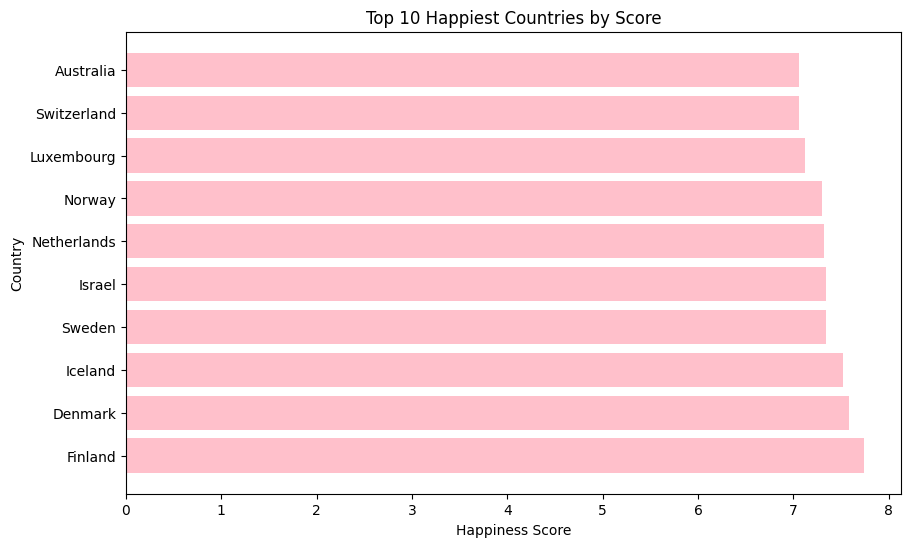

In [ ]:
import matplotlib.pyplot as plt

#Sorting the values in descending order
SortedData=data.sort_values(by='score', ascending=False)

#Top-10 happiest countries
happiest10=SortedData.head(10)

#Declarings size for the figure
plt.figure(figsize=(10, 6))

#plotting the bar-chart
plt.barh(happiest10['Country name'], happiest10['score'], color='pink')

#Declaring labels and titles
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.title('Top 10 Happiest Countries by Score')
plt.show()


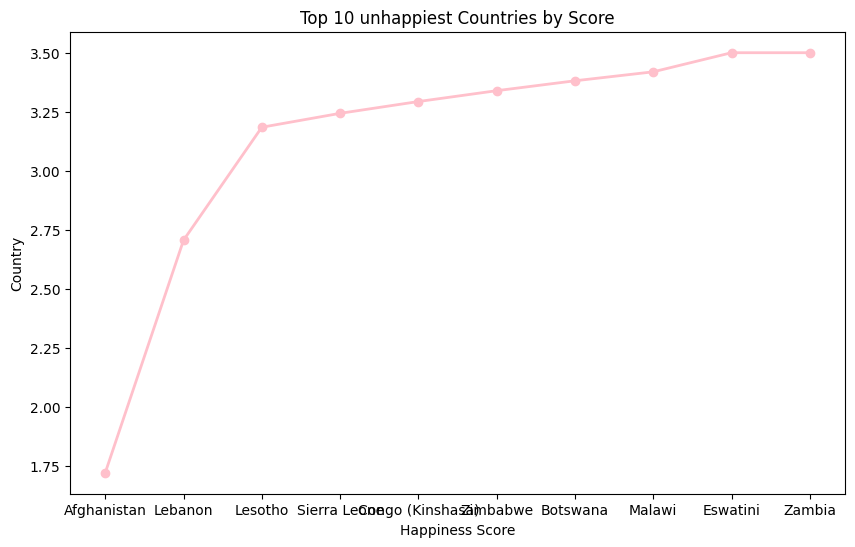

In [ ]:
unhappiest10=data.sort_values(by='score', ascending=True).head(10)
plt.figure(figsize=(10, 6))
plt.plot(unhappiest10['Country name'], unhappiest10['score'], marker='o', color='pink', linestyle='-', linewidth=2)
#Declaring labels and titles
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.title('Top 10 unhappiest Countries by Score')
plt.show()

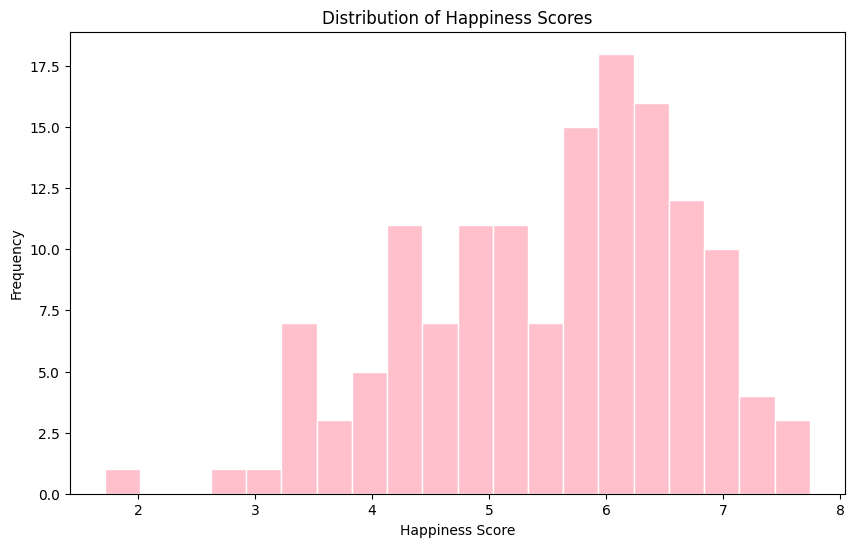

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data['score'], bins=20, color='pink', edgecolor='white')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title('Distribution of Happiness Scores')
plt.show()

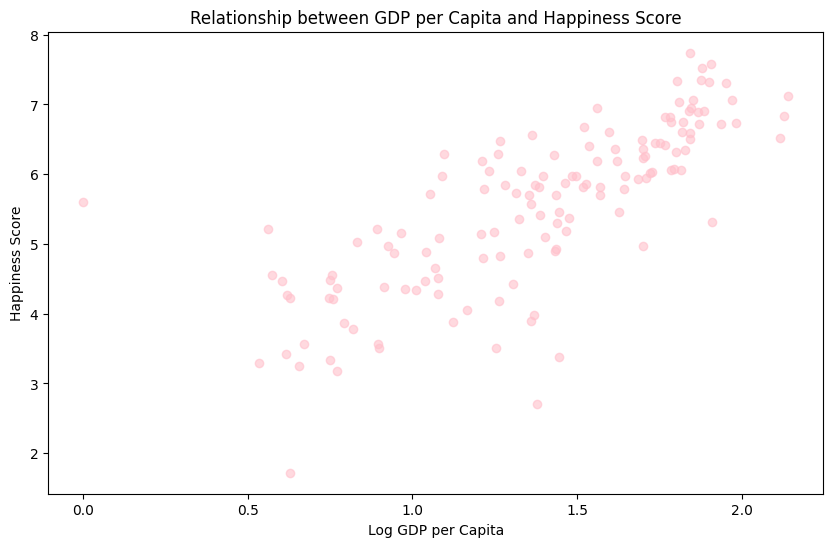

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Log GDP per capita'], data['score'], color='pink', alpha=0.6)
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Relationship between GDP per Capita and Happiness Score')
plt.show()

#3.2

Filtered data has been saved as 'SouthAsianCountries.csv'.
    Country name  Composite Score
92         Nepal           0.8159
107     Pakistan           0.7039
125        India           0.7874
127    Sri Lanka           1.0739
128   Bangladesh           0.6774
142  Afghanistan           0.3238
    Country name  score  Log GDP per capita  Social support  \
127    Sri Lanka  3.898               1.361           1.179   
92         Nepal  5.158               0.965           0.990   
125        India  4.054               1.166           0.653   
107     Pakistan  4.657               1.069           0.600   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
127                    0.586                         0.583       0.144   
92                     0.443                         0.653       0.209   
125                    0.417           

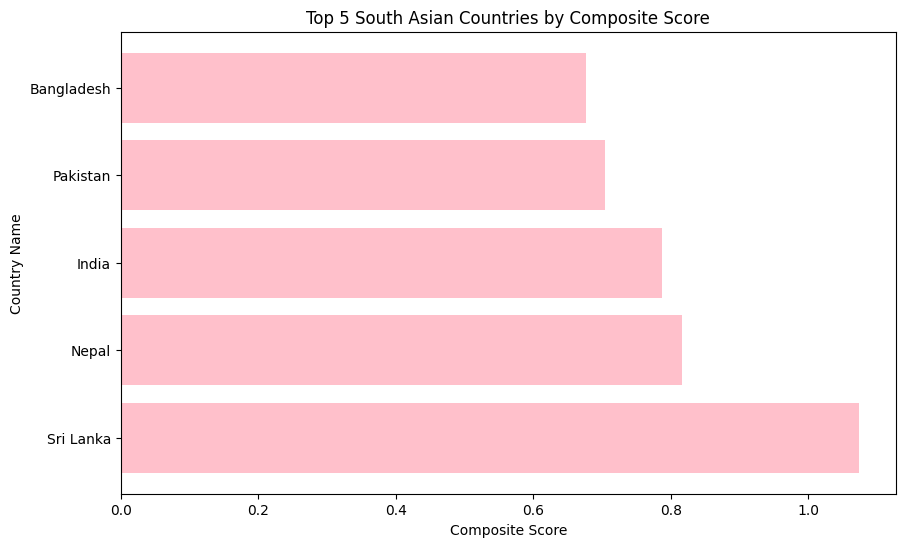

In [4]:
#Declaring a list of south-asian countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

#Filter the data to see if countries in our dataset match the countries in above list
filteredData = data[data['Country name'].isin(south_asian_countries)]
#print(filteredData)

#Saving the filtered data to another csv file
filteredData.to_csv('SouthAsianCountries.csv', index=False)
print("Filtered data has been saved as 'SouthAsianCountries.csv'.")


#Defining the counries list
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
southAsianData = data[data['Country name'].isin(south_asian_countries)].copy()

#Calculating the Composite score of countries and storing them in a new column
southAsianData.loc[:,'Composite Score']=0.40 * southAsianData['Log GDP per capita']+ 0.30 * southAsianData['Social support']+ 0.30 * southAsianData['Healthy life expectancy']
print(southAsianData[['Country name', 'Composite Score']])


#Ranking countries based on Composite score
sortedData=southAsianData.sort_values(by='Composite Score', ascending=False)
print(sortedData)


import matplotlib.pyplot as plt
SACountries5 = southAsianData.sort_values(by='Composite Score', ascending=False).head(5)
plt.figure(figsize=(10, 6))
plt.barh(SACountries5['Country name'], SACountries5['Composite Score'], color='pink')
plt.xlabel('Composite Score')
plt.ylabel('Country Name')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.show()


Outlier countries based on Score:
    Country name  score
142  Afghanistan  1.721
Outlier countries based on GDP per Capita:
    Country name  Log GDP per capita
142  Afghanistan               0.628


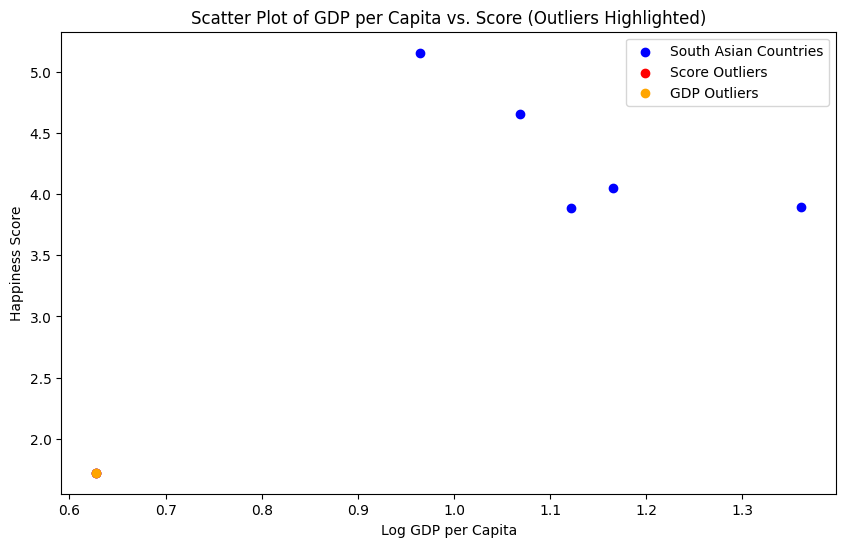

In [ ]:
# Calculate Q1, Q3, and IQR for Score
Q1_score = southAsianData['score'].quantile(0.25)
Q3_score = southAsianData['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score

# Define lower and upper bounds for Score
lower_bound_score = Q1_score - 1.5 * IQR_score
upper_bound_score = Q3_score + 1.5 * IQR_score

# Calculate Q1, Q3, and IQR for GDP per Capita
Q1_gdp = southAsianData['Log GDP per capita'].quantile(0.25)
Q3_gdp = southAsianData['Log GDP per capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

# Define lower and upper bounds for GDP per Capita
lower_bound_gdp = Q1_gdp - 1.5 * IQR_gdp
upper_bound_gdp = Q3_gdp + 1.5 * IQR_gdp

# Identify outliers for Score
score_outliers = southAsianData[(southAsianData['score'] < lower_bound_score) | (southAsianData['score'] > upper_bound_score)]

# Identify outliers for GDP per Capita
gdp_outliers = southAsianData[(southAsianData['Log GDP per capita'] < lower_bound_gdp) | (southAsianData['Log GDP per capita'] > upper_bound_gdp)]

print("Outlier countries based on Score:")
print(score_outliers[['Country name', 'score']])

print("Outlier countries based on GDP per Capita:")
print(gdp_outliers[['Country name', 'Log GDP per capita']])

import matplotlib.pyplot as plt
# Scatter plot for GDP per Capita vs. Score
plt.figure(figsize=(10, 6))
plt.scatter(southAsianData['Log GDP per capita'], southAsianData['score'], color='blue', label='South Asian Countries')
# Highlight Score Outliers
plt.scatter(score_outliers['Log GDP per capita'], score_outliers['score'], color='red', label='Score Outliers')
# Highlight GDP Outliers
plt.scatter(gdp_outliers['Log GDP per capita'], gdp_outliers['score'], color='orange', label='GDP Outliers')
# Add labels and title
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Scatter Plot of GDP per Capita vs. Score (Outliers Highlighted)')
plt.legend()
plt.show()


Correlation between Score and Freedom to make life choices: 0.8005185224163315
Correlation between Score and Generosity: 0.874512371253192


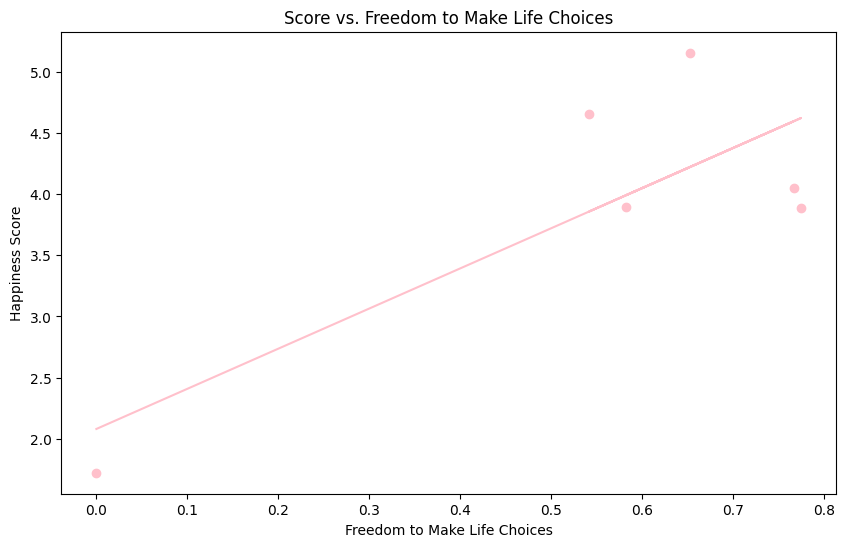

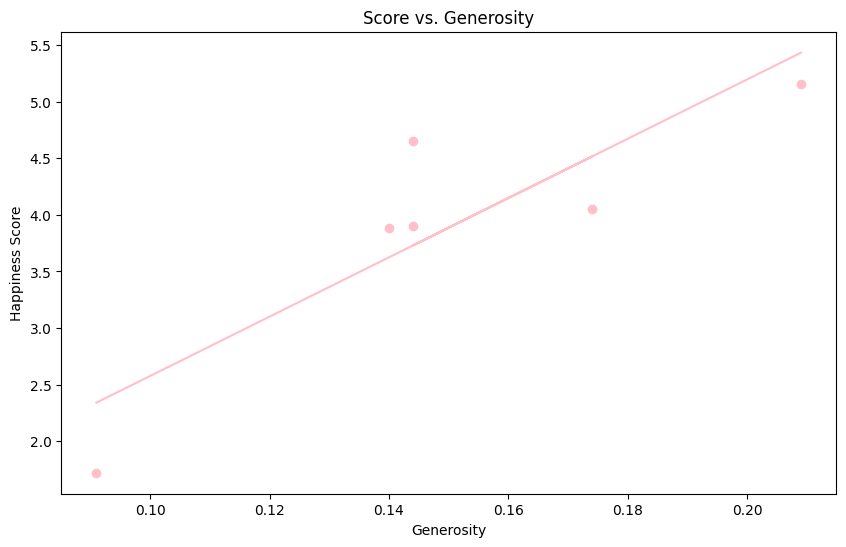

In [ ]:
# Calculate the Pearson correlation between 'score' and 'Freedom to make life choices'
correlation_freedom = southAsianData['score'].corr(southAsianData['Freedom to make life choices'])

# Calculate the Pearson correlation between 'score' and 'Generosity'
correlation_generosity = southAsianData['score'].corr(southAsianData['Generosity'])
# Print the correlation values
print(f"Correlation between Score and Freedom to make life choices: {correlation_freedom}")
print(f"Correlation between Score and Generosity: {correlation_generosity}")

import numpy as np
# Scatter plot for Score vs. Freedom to Make Life Choices
plt.figure(figsize=(10, 6))
plt.scatter(southAsianData['Freedom to make life choices'], southAsianData['score'], color='pink', label='Data Points')
# Adding a trendline (linear fit)
m, b = np.polyfit(southAsianData['Freedom to make life choices'], southAsianData['score'], 1)
plt.plot(southAsianData['Freedom to make life choices'], m * southAsianData['Freedom to make life choices'] + b, color='pink')

plt.title('Score vs. Freedom to Make Life Choices')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')
plt.show()
# Scatter plot for Score vs. Generosity
plt.figure(figsize=(10, 6))
plt.scatter(southAsianData['Generosity'], southAsianData['score'], color='pink')
m, b = np.polyfit(southAsianData['Generosity'], southAsianData['score'], 1)
plt.plot(southAsianData['Generosity'], m * southAsianData['Generosity'] + b, color='pink')
plt.title('Score vs. Generosity')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.show()

In [5]:
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]
middleEastData = data[data['Country name'].isin(middle_east_countries)]
middleEastData.to_csv('MiddleEastCountries.csv', index=False)
# Calculate the mean and standard deviation for South Asia
south_asia_mean = southAsianData['score'].mean()
south_asia_std = southAsianData['score'].std()

# Calculate the mean and standard deviation for the Middle East
middle_east_mean = middleEastData['score'].mean()
middle_east_std = middleEastData['score'].std()

# Print the results
print("South Asia - Mean Happiness Score:", south_asia_mean)
print("South Asia - Standard Deviation of Happiness Score:", south_asia_std)

print("Middle East - Mean Happiness Score:", middle_east_mean)
print("Middle East - Standard Deviation of Happiness Score:", middle_east_std)

# Comparison: Which region has higher average happiness score
if south_asia_mean > middle_east_mean:
    print("\nSouth Asia has a higher average happiness score.")
else:
    print("\nMiddle East has a higher average happiness score.")

South Asia - Mean Happiness Score: 3.895666666666667
South Asia - Standard Deviation of Happiness Score: 1.1770690152521504
Middle East - Mean Happiness Score: 5.412100000000001
Middle East - Standard Deviation of Happiness Score: 1.5662011684327144

Middle East has a higher average happiness score.


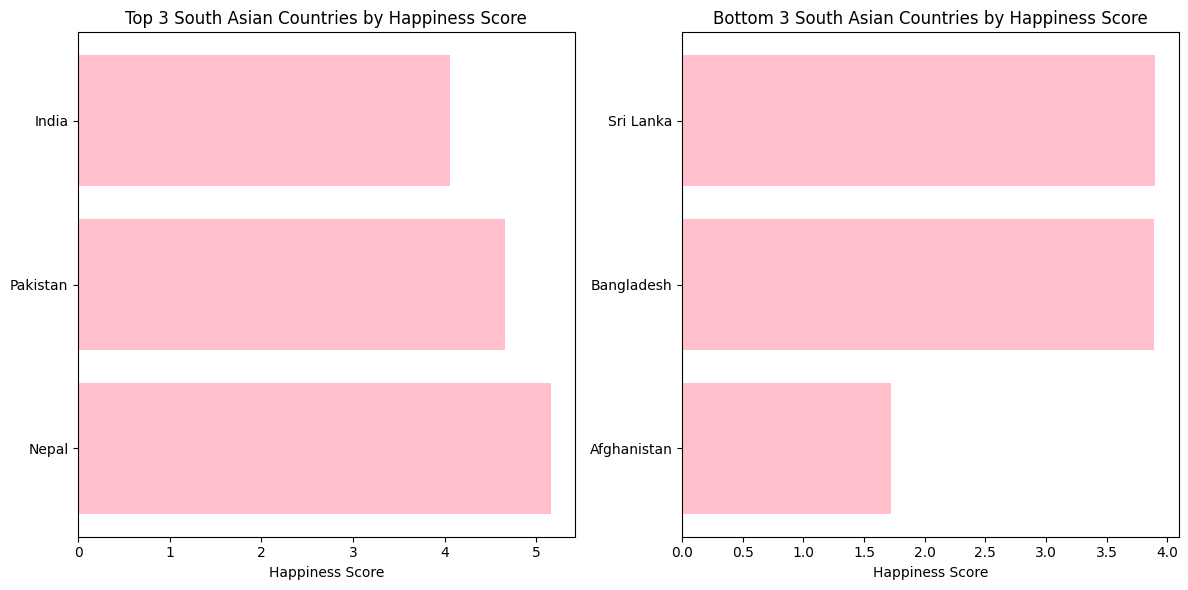

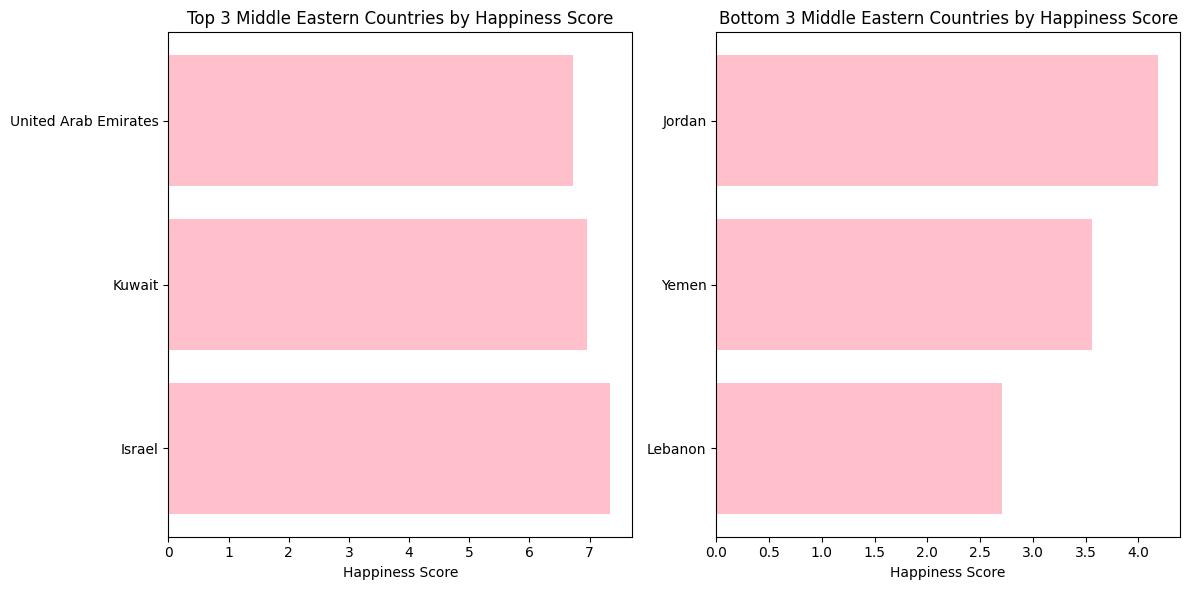

In [ ]:
# Sort the data and get the top 3 and bottom 3 countries based on the happiness score
# For South Asia
south_asia_top3 = southAsianData.sort_values(by='score', ascending=False).head(3)
south_asia_bottom3 = southAsianData.sort_values(by='score', ascending=True).head(3)
# For Middle East
middle_east_top3 = middleEastData.sort_values(by='score', ascending=False).head(3)
middle_east_bottom3 = middleEastData.sort_values(by='score', ascending=True).head(3)
# Plotting bar charts for top 3 and bottom 3 countries in South Asia
plt.figure(figsize=(12, 6))
# Plotting Top 3 South Asia
plt.subplot(1, 2, 1)
plt.barh(south_asia_top3['Country name'], south_asia_top3['score'], color='pink')
plt.xlabel('Happiness Score')
plt.title('Top 3 South Asian Countries by Happiness Score')
# Plotting Bottom 3 South Asia
plt.subplot(1, 2, 2)
plt.barh(south_asia_bottom3['Country name'], south_asia_bottom3['score'], color='pink')
plt.xlabel('Happiness Score')
plt.title('Bottom 3 South Asian Countries by Happiness Score')
plt.tight_layout()
plt.show()
# Plotting bar charts for top 3 and bottom 3 countries in the Middle East
plt.figure(figsize=(12, 6))
# Plotting Top 3 Middle East
plt.subplot(1, 2, 1)
plt.barh(middle_east_top3['Country name'], middle_east_top3['score'], color='pink')
plt.xlabel('Happiness Score')
plt.title('Top 3 Middle Eastern Countries by Happiness Score')
# Plotting Bottom 3 Middle East
plt.subplot(1, 2, 2)
plt.barh(middle_east_bottom3['Country name'], middle_east_bottom3['score'], color='pink')
plt.xlabel('Happiness Score')
plt.title('Bottom 3 Middle Eastern Countries by Happiness Score')
plt.tight_layout()
plt.show()

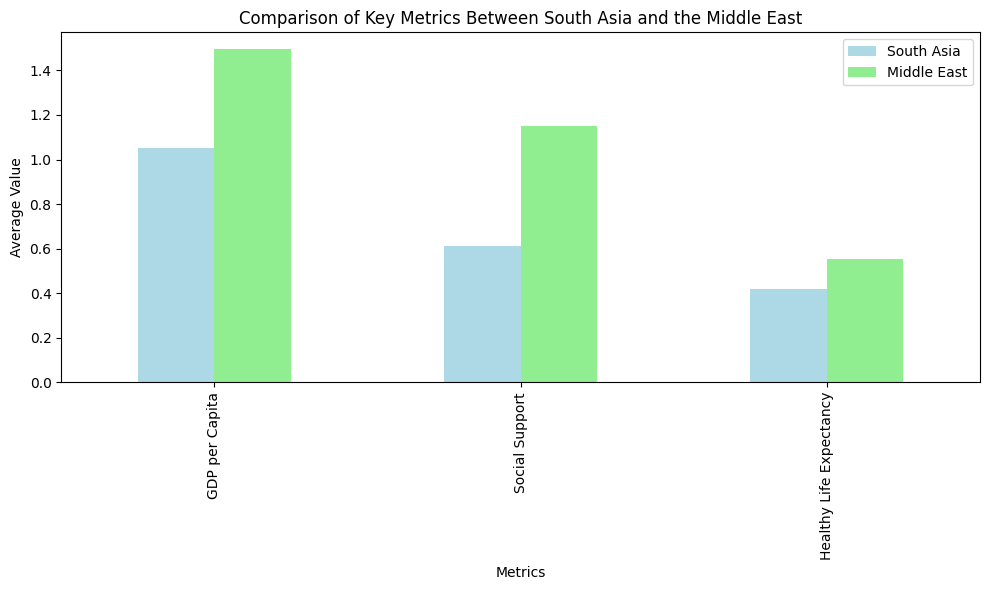

                         South Asia  Middle East
GDP per Capita             1.051833     1.496333
Social Support             0.611833     1.152778
Healthy Life Expectancy    0.420333     0.554111


In [ ]:

# Calculating mean values for key metrics in each region
south_asia_metrics = {
    'GDP per Capita': southAsianData['Log GDP per capita'].mean(),
    'Social Support': southAsianData['Social support'].mean(),
    'Healthy Life Expectancy': southAsianData['Healthy life expectancy'].mean()
}
middle_east_metrics = {
    'GDP per Capita': middleEastData['Log GDP per capita'].mean(),
    'Social Support': middleEastData['Social support'].mean(),
    'Healthy Life Expectancy': middleEastData['Healthy life expectancy'].mean()
}
# Creating a DataFrame for the comparison
metrics_comparison = pd.DataFrame({
    'South Asia': south_asia_metrics,
    'Middle East': middle_east_metrics
})

# Plotting grouped bar chart
metrics_comparison.plot(kind='bar', figsize=(10, 6), color=['lightblue', 'lightgreen'])

# Adding labels and title
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.title('Comparison of Key Metrics Between South Asia and the Middle East')

# Show the plot
plt.tight_layout()
plt.show()

# Print the metrics comparison for reference
print(metrics_comparison)

In [ ]:
south_asia_max_score = southAsianData['score'].max()
south_asia_min_score = southAsianData['score'].min()
south_asia_mean_score = southAsianData['score'].mean()
south_asia_std_score = southAsianData['score'].std()

south_asia_range = south_asia_max_score - south_asia_min_score
south_asia_cv = (south_asia_std_score / south_asia_mean_score) * 100

# Calculate Range and CV for Middle East
middle_east_max_score = middleEastData['score'].max()
middle_east_min_score = middleEastData['score'].min()
middle_east_mean_score = middleEastData['score'].mean()
middle_east_std_score = middleEastData['score'].std()

middle_east_range = middle_east_max_score - middle_east_min_score
middle_east_cv = (middle_east_std_score / middle_east_mean_score) * 100

# Print results
print(f"South Asia - Range: {south_asia_range}, CV: {south_asia_cv}%")
print(f"Middle East - Range: {middle_east_range}, CV: {middle_east_cv}%")

# Determine which region has greater variability
if south_asia_cv > middle_east_cv:
    print("South Asia has greater variability in happiness.")
else:
    print("Middle East has greater variability in happiness.")

South Asia - Range: 3.4370000000000003, CV: 30.21482883337427%
Middle East - Range: 4.634, CV: 28.938880812119404%
South Asia has greater variability in happiness.


South Asia - Correlation with Freedom to Make Life Choices: 0.8005185224163315
South Asia - Correlation with Generosity: 0.874512371253192
Middle East - Correlation with Freedom to Make Life Choices: 0.8632202433827544
Middle East - Correlation with Generosity: 0.6275236536964182


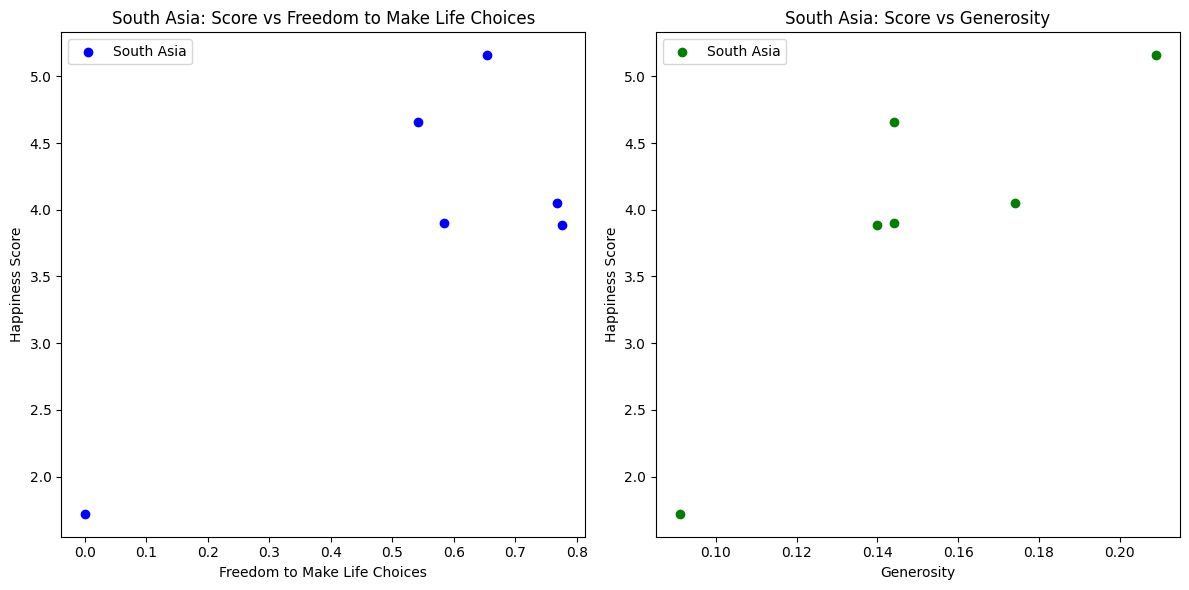

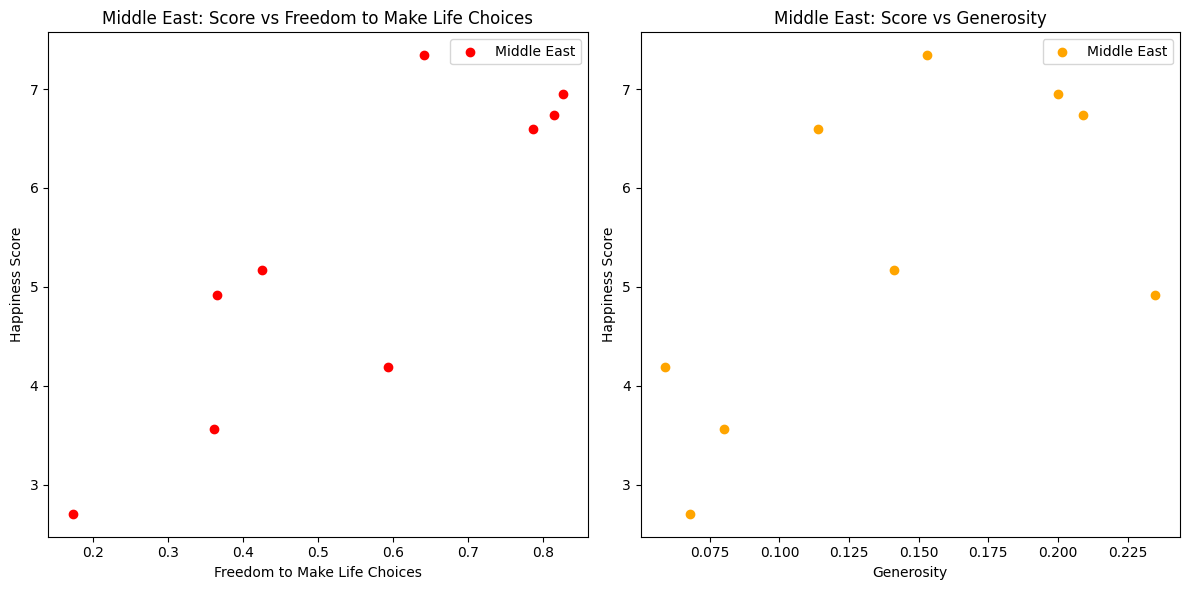

In [ ]:
# Correlation Analysis for South Asia
south_asia_corr_freedom = southAsianData['score'].corr(southAsianData['Freedom to make life choices'])
south_asia_corr_generosity = southAsianData['score'].corr(southAsianData['Generosity'])
# Correlation Analysis for Middle East
middle_east_corr_freedom = middleEastData['score'].corr(middleEastData['Freedom to make life choices'])
middle_east_corr_generosity = middleEastData['score'].corr(middleEastData['Generosity'])
# Print correlation results
print(f"South Asia - Correlation with Freedom to Make Life Choices: {south_asia_corr_freedom}")
print(f"South Asia - Correlation with Generosity: {south_asia_corr_generosity}")
print(f"Middle East - Correlation with Freedom to Make Life Choices: {middle_east_corr_freedom}")
print(f"Middle East - Correlation with Generosity: {middle_east_corr_generosity}")
# Scatter Plots for South Asia
plt.figure(figsize=(12, 6))
# Scatter plot for Score vs. Freedom to Make Life Choices
plt.subplot(1, 2, 1)
plt.scatter(southAsianData['Freedom to make life choices'], southAsianData['score'], color='blue', label='South Asia')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')
plt.title('South Asia: Score vs Freedom to Make Life Choices')
plt.legend()
# Scatter plot for Score vs. Generosity
plt.subplot(1, 2, 2)
plt.scatter(southAsianData['Generosity'], southAsianData['score'], color='green', label='South Asia')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.title('South Asia: Score vs Generosity')
plt.legend()
plt.tight_layout()
plt.show()
# Scatter Plots for Middle East
plt.figure(figsize=(12, 6))
# Scatter plot for Score vs. Freedom to Make Life Choices
plt.subplot(1, 2, 1)
plt.scatter(middleEastData['Freedom to make life choices'], middleEastData['score'], color='red', label='Middle East')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')
plt.title('Middle East: Score vs Freedom to Make Life Choices')
plt.legend()
# Scatter plot for Score vs. Generosity
plt.subplot(1, 2, 2)
plt.scatter(middleEastData['Generosity'], middleEastData['score'], color='orange', label='Middle East')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.title('Middle East: Score vs Generosity')
plt.legend()
plt.tight_layout()
plt.show()

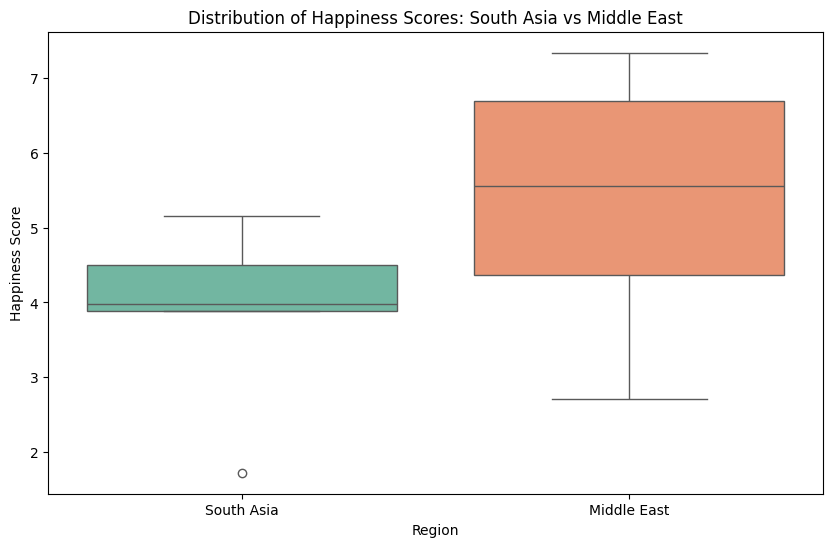

In [ ]:
import seaborn as sns
# Add a column for Region to both datasets
southAsianData.loc[:, 'Region'] = 'South Asia'
middleEastData.loc[:, 'Region'] = 'Middle East'

# Combine the datasets into one for easy plotting
combinedData = pd.concat([southAsianData[['score', 'Region']], middleEastData[['score', 'Region']]])

# Create boxplot with 'Region' mapped to 'hue'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=combinedData, hue='Region', palette="Set2", showfliers=True)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.title('Distribution of Happiness Scores: South Asia vs Middle East')

# Show the plot
plt.show()